<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

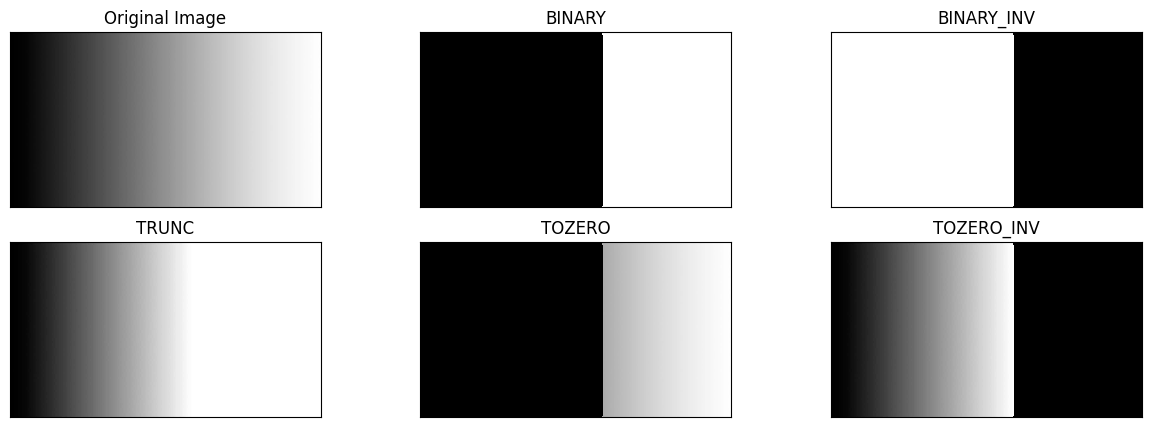

In [ ]:
def global_thresholding(image_path, threshold_value):
    img = cv.imread(image_path, 0)

    ret, thresh1 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

    ret, thresh2 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY_INV)

    ret, thresh3 = cv.threshold(img, threshold_value, 255, cv.THRESH_TRUNC)

    ret, thresh4 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO)

    ret, thresh5 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO_INV)

    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray', interpolation='nearest')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

image_path = '/content/drive/MyDrive/PCVK/Assets/Assets/gradient.jpg'
threshold_value = 170
global_thresholding(image_path, threshold_value)


<ipython-input-6-cba958751a11>:28: RuntimeWarning: invalid value encountered in divide
  between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))


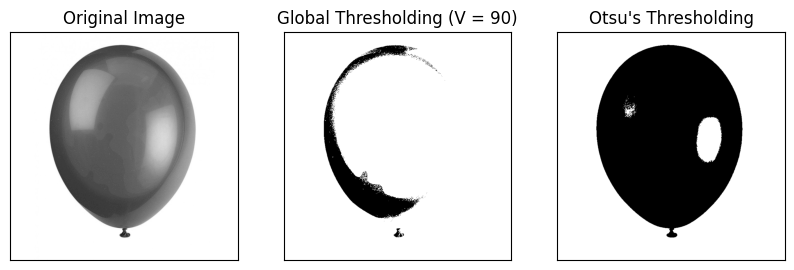

In [ ]:

def global_thresholding(img, thresh_value):
    _, global_thresh = cv.threshold(img, thresh_value, 255, cv.THRESH_BINARY)
    return global_thresh

filename = '/content/drive/MyDrive/PCVK/Assets/Assets/balloon.jpg'
img = cv.imread(filename, 0)

if img is None:
    print(f"Error: Unable to load image at {filename}. Please check the file path.")
else:
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    hist = hist.astype(float) / hist.sum()
    cumulative_sum = np.cumsum(hist)
    cumulative_mean = np.cumsum(hist * np.arange(256))
    global_mean = cumulative_mean[-1]
    between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))
    between_class_variance = np.nan_to_num(between_class_variance)
    optimal_threshold = np.argmax(between_class_variance)
    global_thresh_value = 90
    global_result = global_thresholding(img, global_thresh_value)
    _, otsu_result = cv.threshold(img, optimal_threshold, 255, cv.THRESH_BINARY)
    titles = ['Original Image', 'Global Thresholding (V = 90)', "Otsu's Thresholding"]
    images = [img, global_result, otsu_result]

    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()



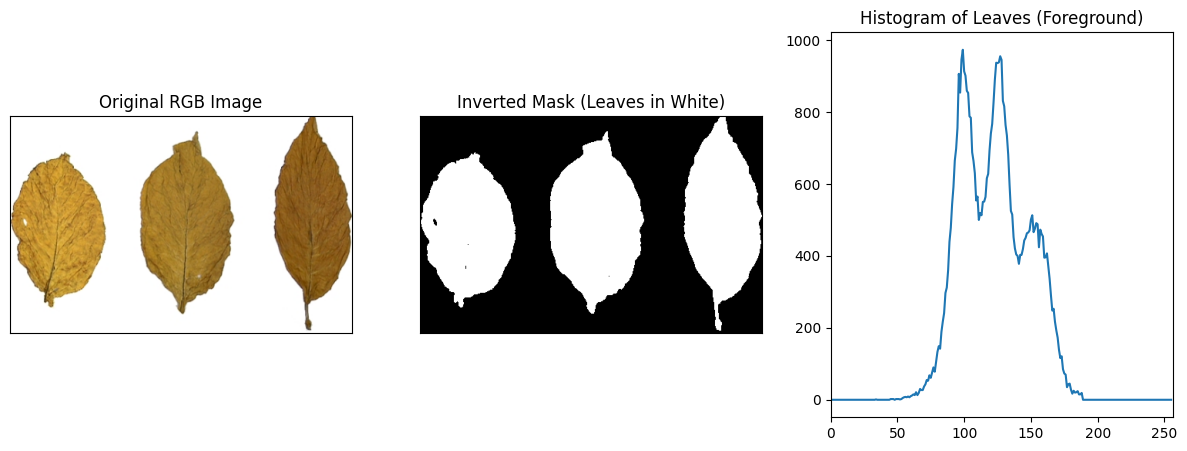

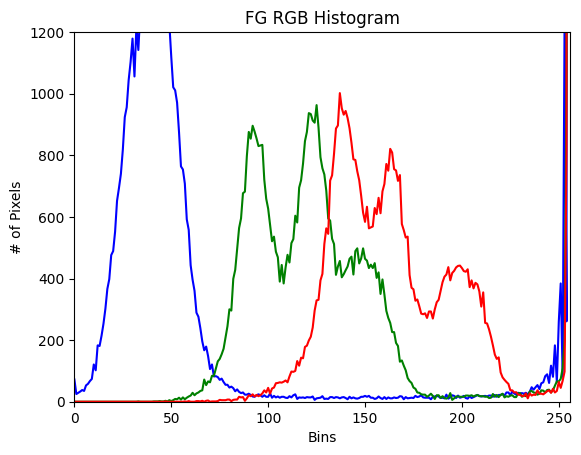

In [ ]:
filename = '/content/drive/MyDrive/PCVK/Assets/Assets/tobacco.jpg'
img_color = cv.imread(filename)
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_gray = cv.imread(filename, cv.IMREAD_GRAYSCALE)
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
mask_inv = cv.bitwise_not(mask)
hist_foreground = cv.calcHist([img_gray], [0], mask_inv, [256], [0, 256])
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(mask_inv, cmap='gray')
plt.title('Inverted Mask (Leaves in White)')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.plot(hist_foreground)
plt.title('Histogram of Leaves (Foreground)')
plt.xlim([0, 256])

plt.show()

chans = cv.split(img_color)
colors = ('b', 'g', 'r')

plt.figure()
plt.title('FG RGB Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.ylim([0, 1200])
plt.show()

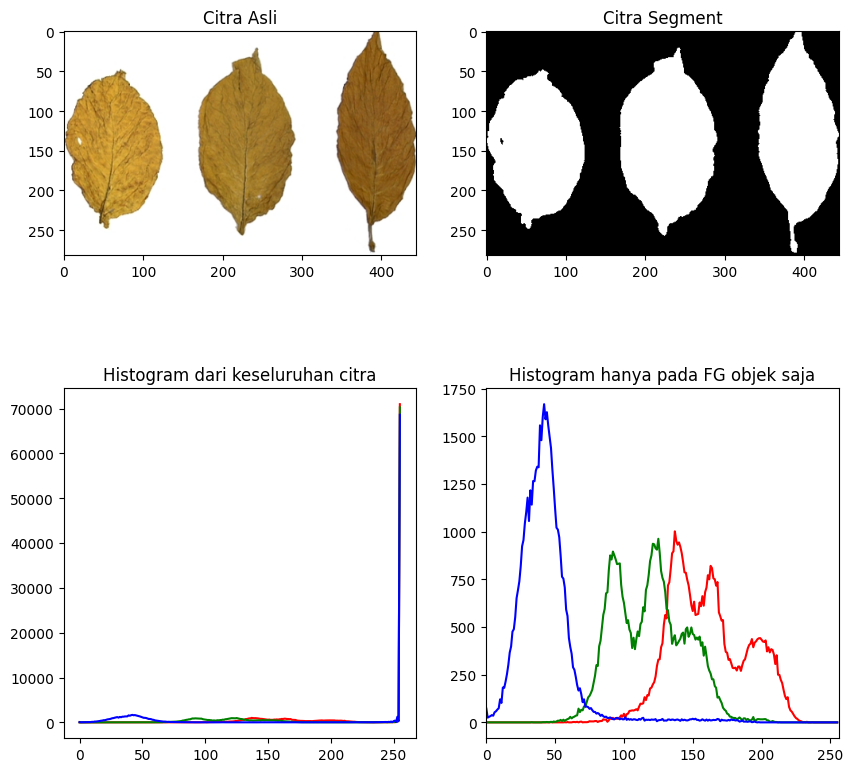

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Assets/Assets/tobacco.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)


plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()


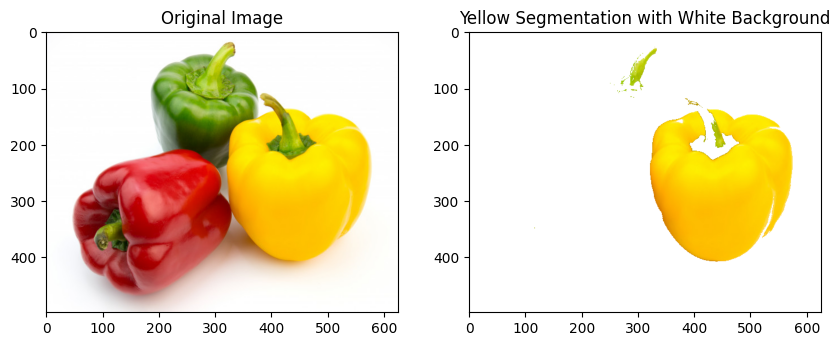

In [ ]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/peppers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)


yellow_rgb = np.array([255, 255, 0])
distances = np.linalg.norm(centers - yellow_rgb, axis=1)
yellow_cluster_index = np.argmin(distances)

mask = (labels.flatten() == yellow_cluster_index)
yellow_only = np.ones_like(image) * 255
yellow_only[mask.reshape(image.shape[:2])] = image[mask.reshape(image.shape[:2])]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(yellow_only)
plt.title("Yellow Segmentation with White Background")
plt.show()

 Jika jumlah klaster tidak dipilih dengan hati-hati, beberapa warna mungkin terbagi ke beberapa klaster, atau warna yang berbeda bisa dikelompokkan bersama, sehingga hasil segmentasi tidak lengkap atau menghasilkan noise pada output.

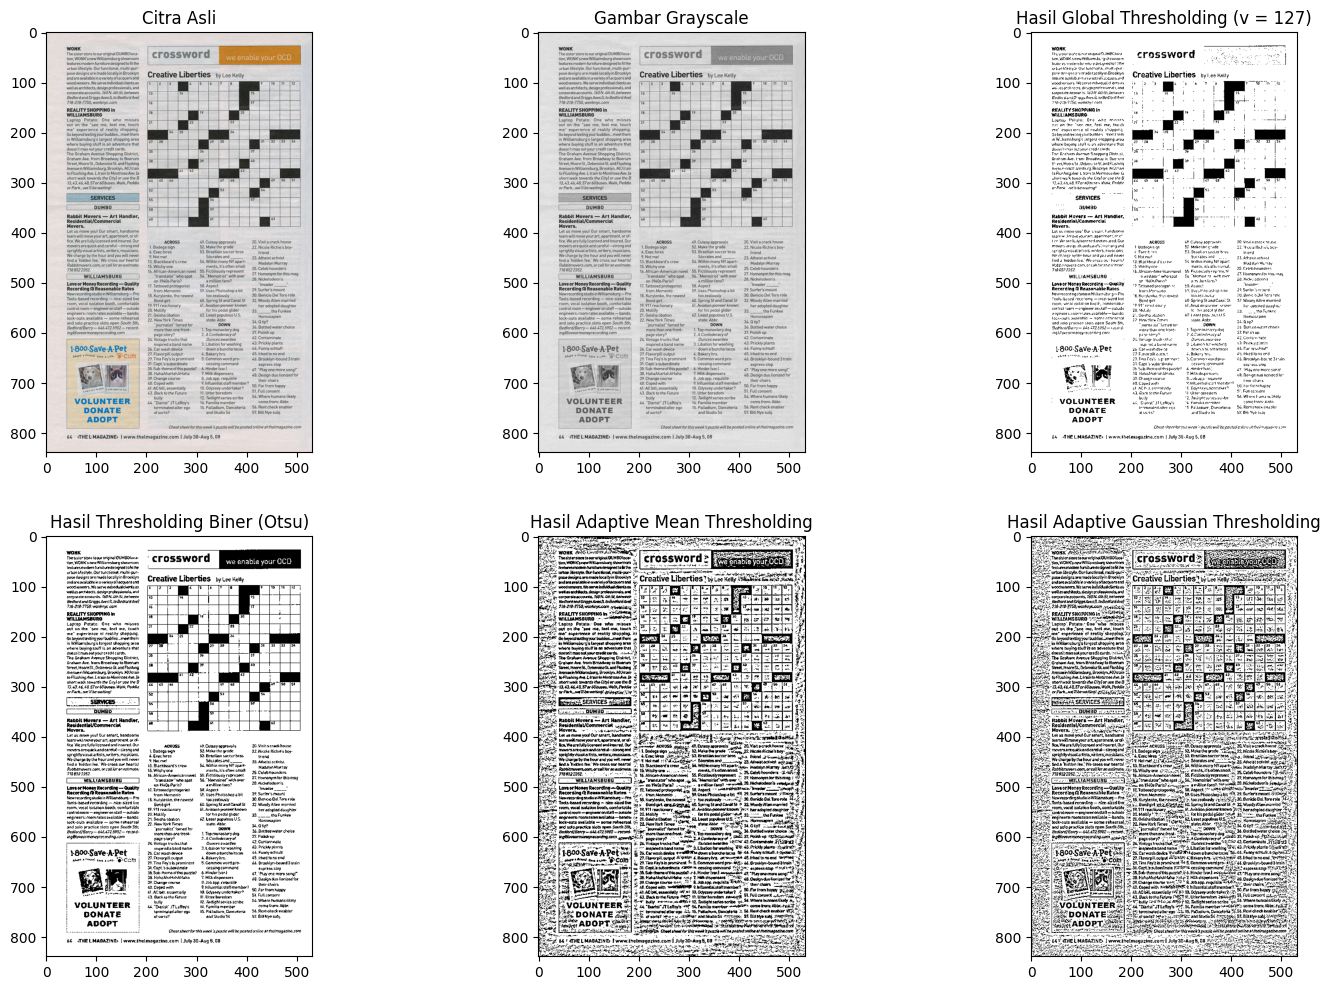

In [ ]:
image_path = '/content/drive/MyDrive/PCVK/Assets/Assets/crossword.jpg'

img = cv.imread(image_path)
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret_global, binary_threshold_global = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)
ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
adaptive_mean = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
adaptive_gaussian = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')

plt.subplot(2, 3, 3)
plt.imshow(binary_threshold_global, cmap='gray')
plt.title('Hasil Global Thresholding (v = 127)')

plt.subplot(2, 3, 4)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')

plt.subplot(2, 3, 5)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Hasil Adaptive Mean Thresholding')

plt.subplot(2, 3, 6)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Hasil Adaptive Gaussian Thresholding')

plt.show()


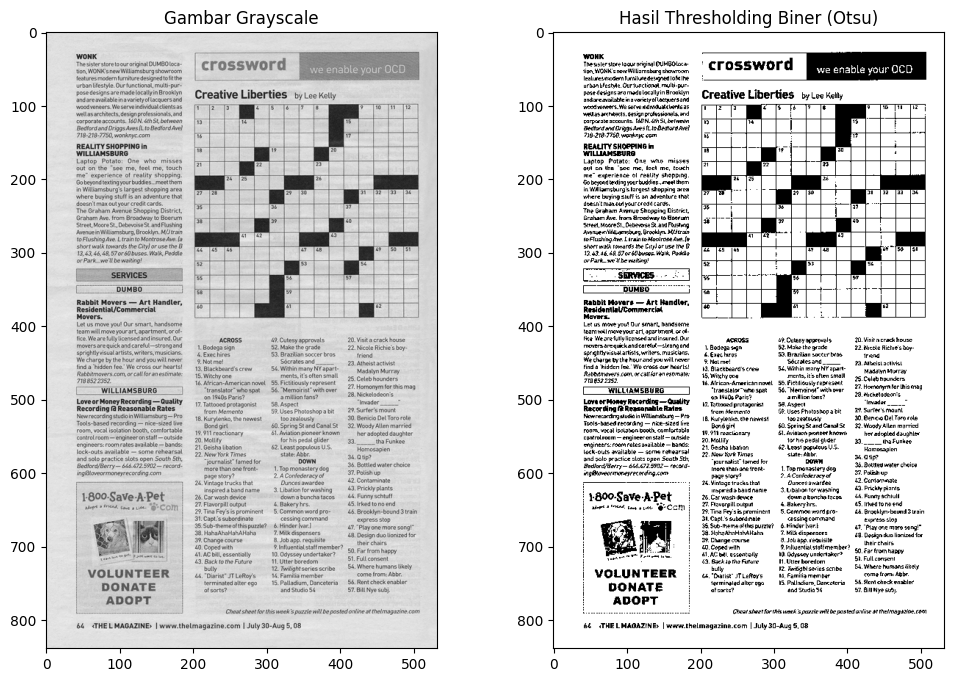

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/crossword.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')

plt.subplot(1, 2, 2)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')

plt.show()